In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


plt.rcParams['figure.figsize'] = (15, 10)


In [2]:
df = pd.read_csv('train.csv')

# 1 了解数据

1.查看数据形状
2.查看数据类型，缺失值情况


In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# 2 确定分析目标

目标：根据给定的特征和变量来预测房价SalePrice

1.选取目标变量：房价  SalePrice
2.查看SalePrice的分布特点


In [5]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


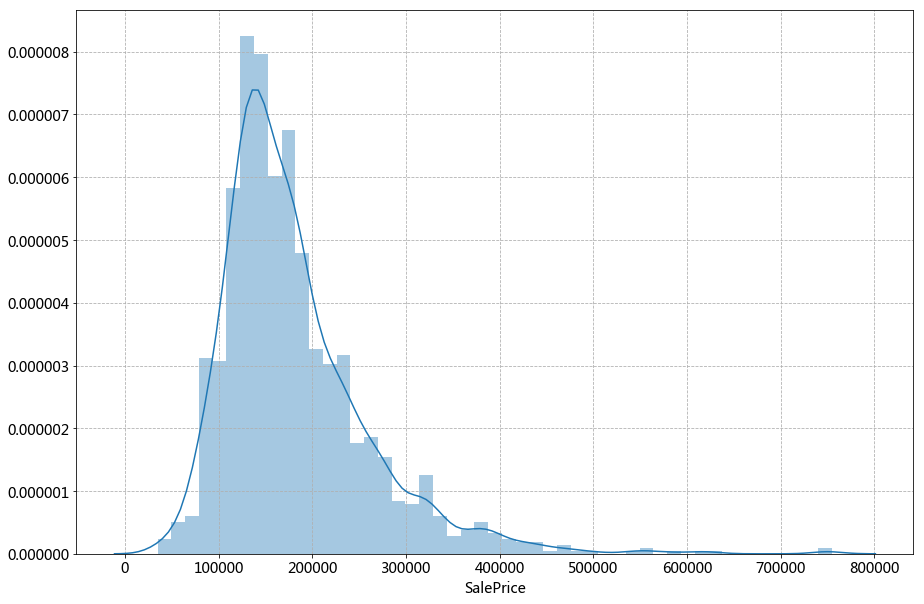

In [6]:
sns.distplot(df['SalePrice'])

房价大部分分布在100000-200000之间，且分布特点为右偏分布


# 3 探索分析

查看部分特征或变量与SalePrice的相关性

## 3.1 相关性分析

1.连续型变量之间，散点图
sns.jointplot()
相关系数

2.离散型变量与连续型变量之间，箱型图或柱状图
sns.boxplot()
sns.barplot()
观察目标变量随类型变量的变化趋势


D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


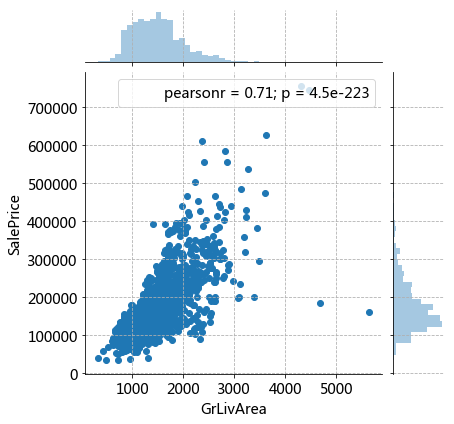

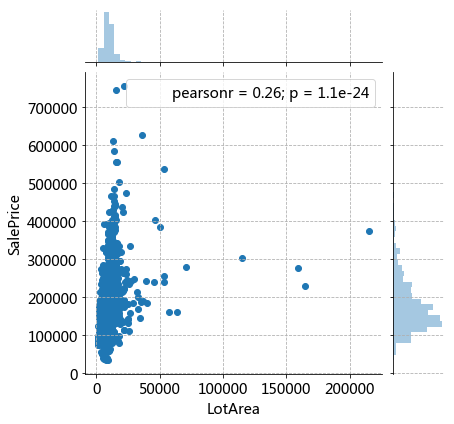

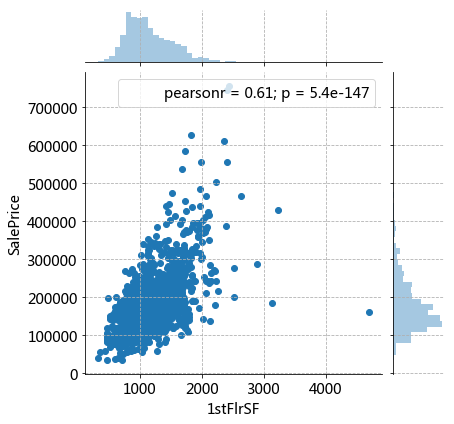

In [7]:
# 连续型变量之间的相关性分析

sns.jointplot(x='GrLivArea',y='SalePrice',data=df)
sns.jointplot(x='LotArea',y='SalePrice',data=df)
sns.jointplot(x='1stFlrSF',y='SalePrice',data=df)


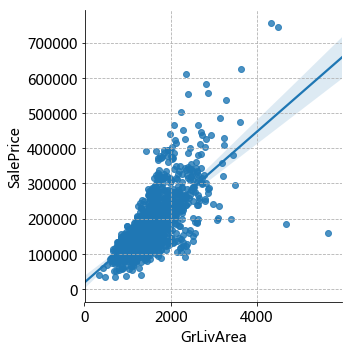

In [8]:
# lmplot()线性回归曲线拟合

sns.lmplot(x='GrLivArea',y='SalePrice',data=df)


D:\Anaconda\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


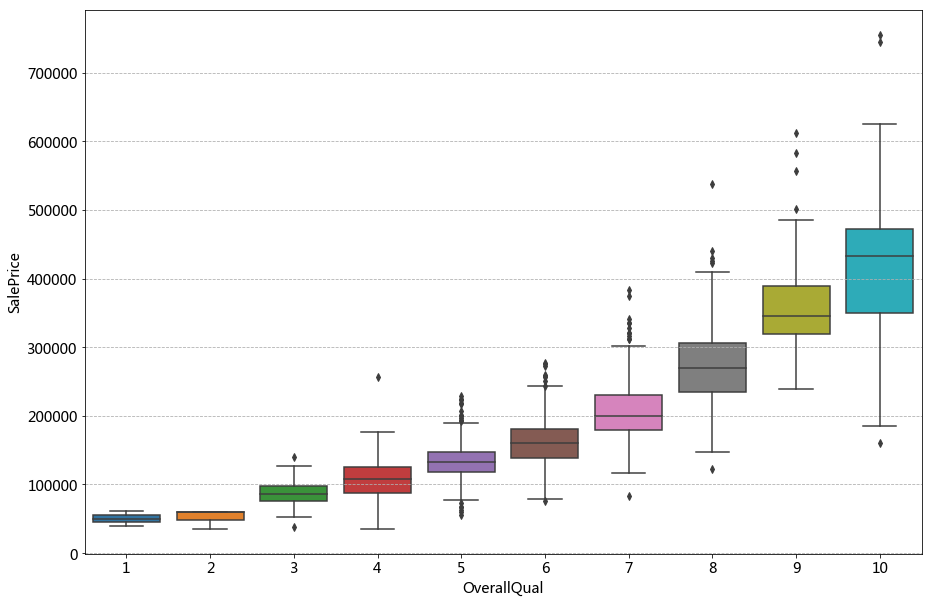

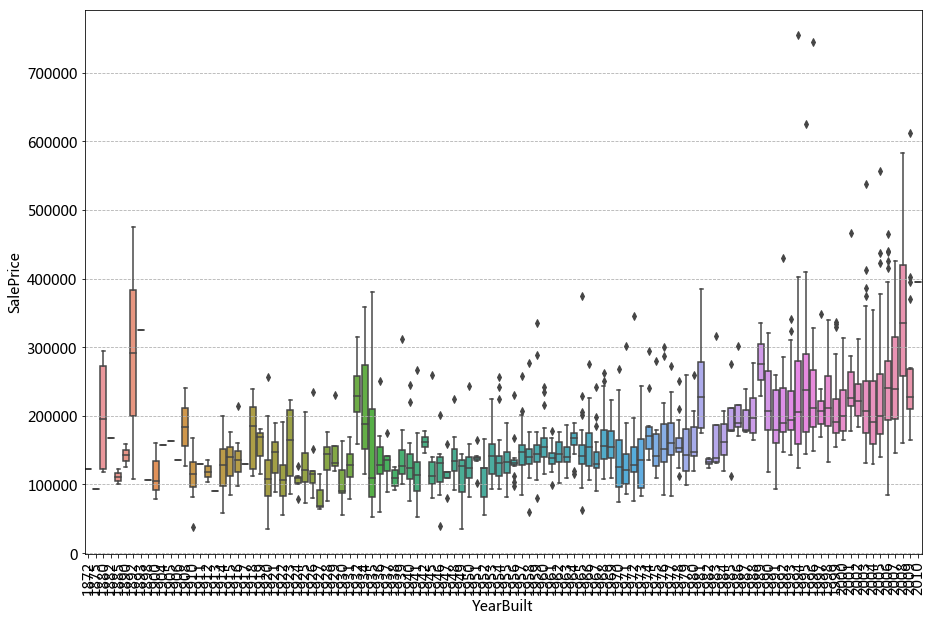

In [11]:
# 离散数据    分类变量与目标变量的关系

# 通过箱型图进行分析

sns.boxplot(x='OverallQual',y='SalePrice',data=df)  
plt.show()
# 变化趋势明显，受类型变量的影响大




sns.boxplot(x='YearBuilt',y='SalePrice',data=df)
plt.xticks(rotation=90)
plt.show()
# 变化趋势不明显


D:\Anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


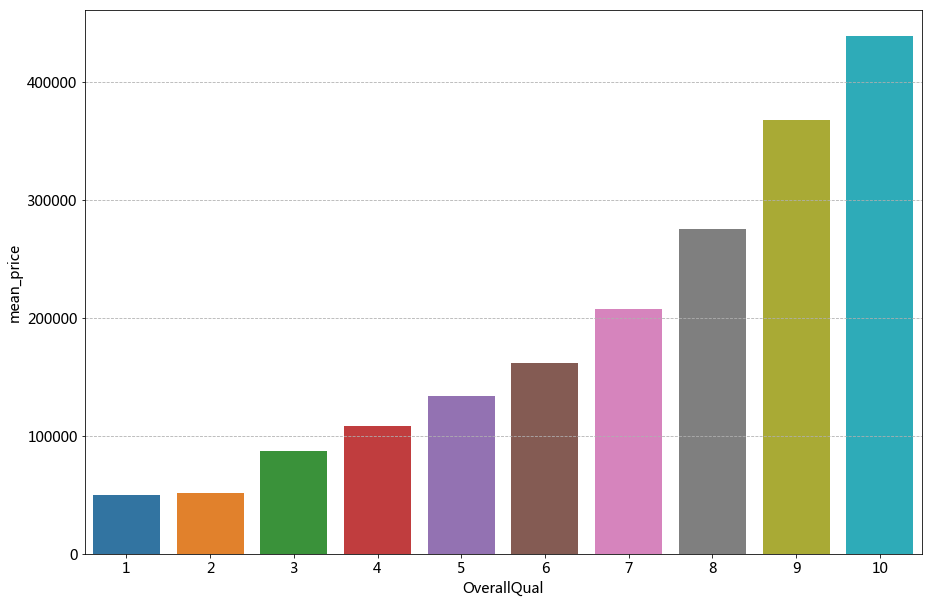

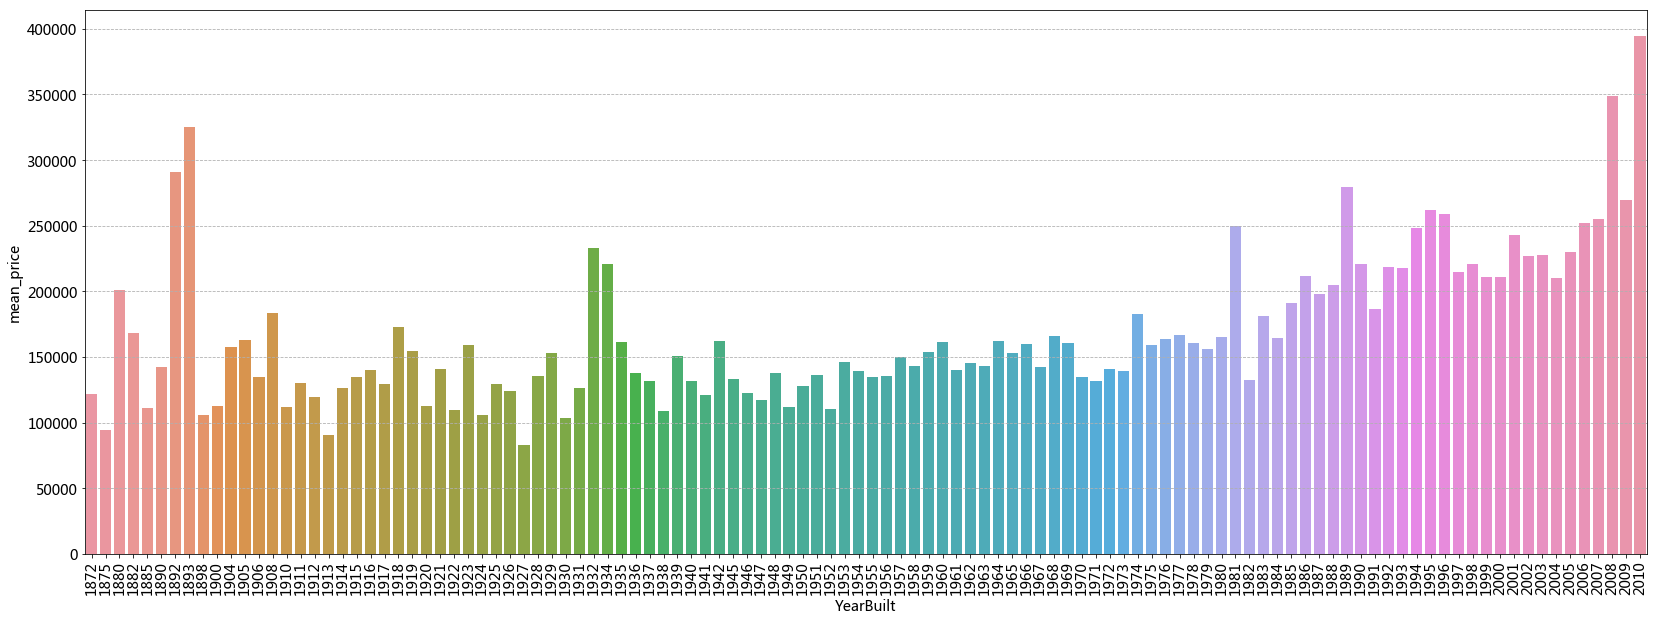

In [25]:
# 使用柱状图观察离散变量对房价的影响大小


grouped=df.groupby('OverallQual')
g1=grouped['SalePrice'].mean()
df1=g1.reset_index('OverallQual',name='mean_price')

sns.barplot(x='OverallQual',y='mean_price',data=df1)
plt.show()


grouped=df.groupby('YearBuilt')
g2=grouped['SalePrice'].mean()
df2=g2.reset_index('YearBuilt',name='mean_price')

fig,ax=plt.subplots(figsize=(28,10))
sns.barplot(x='YearBuilt',y='mean_price',data=df2,ax=ax)
plt.xticks(rotation=90)
plt.show()



# 4 系统的客观分析

围绕目标变量对整个数据集进行分析

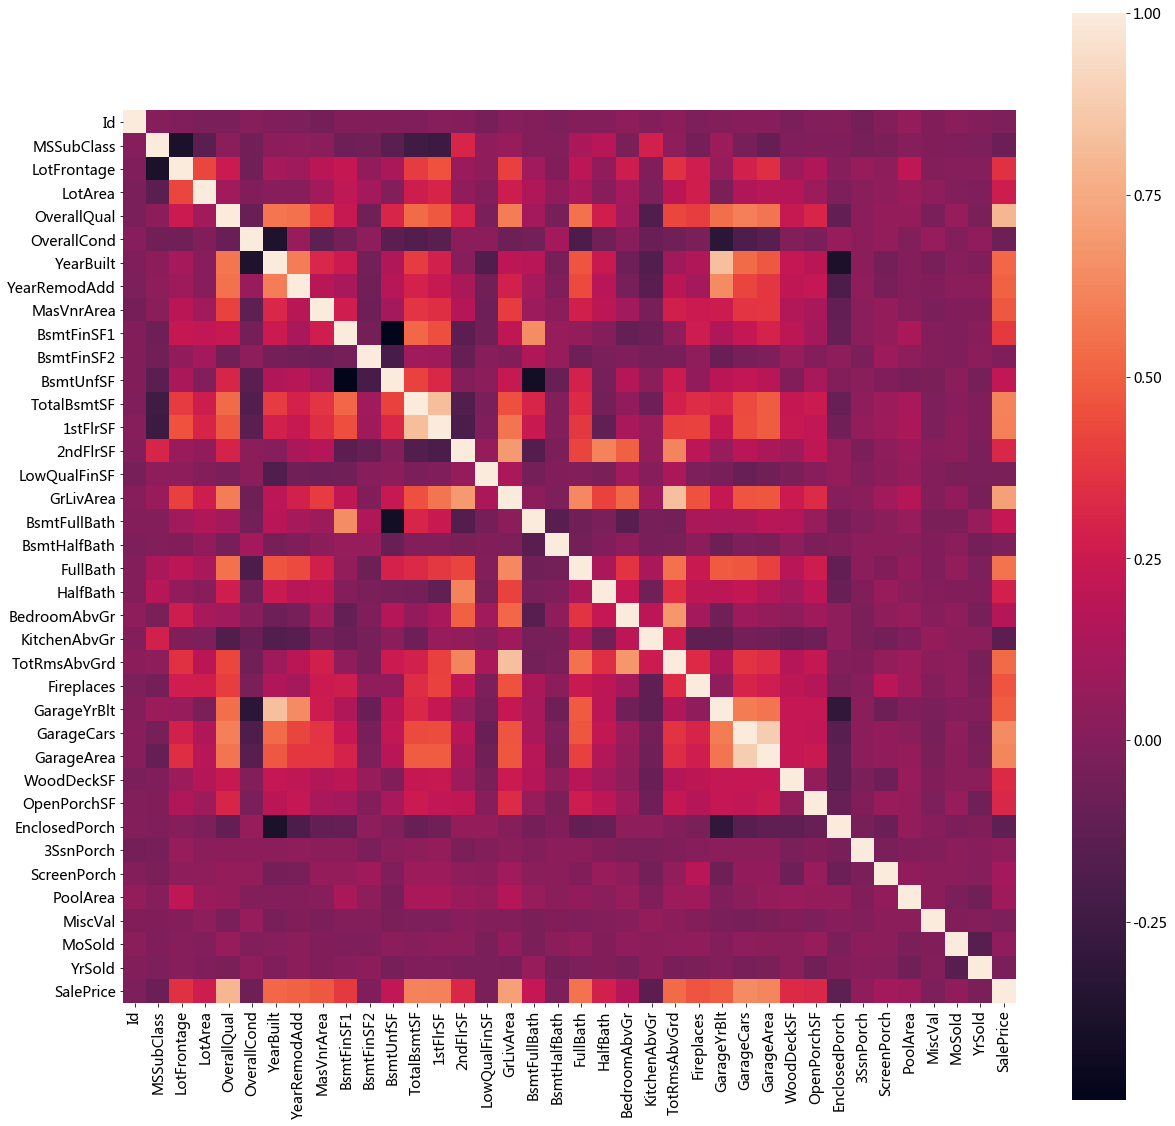

In [4]:

# 所有变量间的相关系数计算

corrmatrix=df.corr()  # 得到相关系数矩阵
# print(corrmatrix)
fig,ax=plt.subplots(figsize=(20,20))
sns.heatmap(corrmatrix,square=True,vmax=1,ax=ax)

从图中可以看出：与SalePrice相关性较大的变量有：OverallQual,GrLivArea.....只能观察出部分变量

还可以看出：TotalBsmtSF与1stFlrSF相关性较大，GarageCars与GarageArea的相关性也较大，这意味着对于目标变量来说，它们是**共线性**的。所谓的共线性就是这些变量对于目标的贡献信息都是一样的，我们只要取其中一个就可以！






Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')
[[208500      7   1710 ...,      2      8   2003]
 [181500      6   1262 ...,      2      6   1976]
 [223500      7   1786 ...,      2      6   2001]
 ..., 
 [266500      7   2340 ...,      2      9   1941]
 [142125      5   1078 ...,      1      5   1950]
 [147500      5   1256 ...,      1      6   1965]]
[[ 1.          0.7909816   0.70862448  0.6404092   0.62343144  0.61358055
   0.60585218  0.56066376  0.53372316  0.52289733]
 [ 0.7909816   1.          0.59300743  0.60067072  0.56202176  0.5378085
   0.47622383  0.55059971  0.42745234  0.57232277]
 [ 0.70862448  0.59300743  1.          0.46724742  0.46899748  0.4548682
   0.56602397  0.63001165  0.82548937  0.19900971]
 [ 0.6404092   0.60067072  0.46724742  1.          0.88247541  0.43458483
   0.43931681  0.46967204  0.36228857  0.53785009]
 [ 0.62343144  0.562

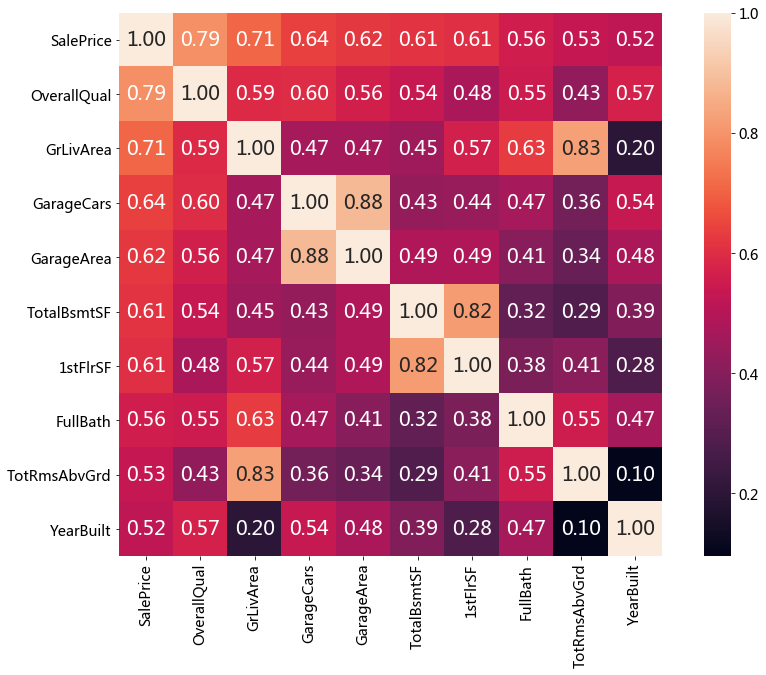

In [53]:
k=10

# 选出与SalePrice相关系数最高的变量

# df.nlargest(k,'xx')  选出以xx列为准，最大的k行数据


cols=corrmatrix.nlargest(k,'SalePrice')['SalePrice'].index
print(cols)

# 计算相关系数
cm=np.corrcoef(df[cols].values.T)  # 转置一下,因为要求每一行是一组数据
print(df[cols].values)
print(cm)

sns.heatmap(cm,xticklabels=cols.values,yticklabels=cols.values,cbar=True,square=True,annot=True,fmt='.2f',annot_kws={'size':20})



结论：
1.OverallQual、GrLivArea、GarageCars(GarageArea)、TotalBsmtSF(1sfFlrSF)、FullBath、YearBuilt与SalePrice有很强的线形关系
2.其中GarageCars与GarageArea共线了，所以选择其中一个即可，这里选择GarageCars,因为它与目标变量的相关性更强一些
3.其中TotalBsmtSF与1sfFlrSF共线了，这里选择TotalBsmtSF
4.其中TotRmsAbvGrd与GrLivArea也共线了，这里只选择GrLivArea



## 深入分析
基于以上的分析，对一些关联性较强的特征做深入分析


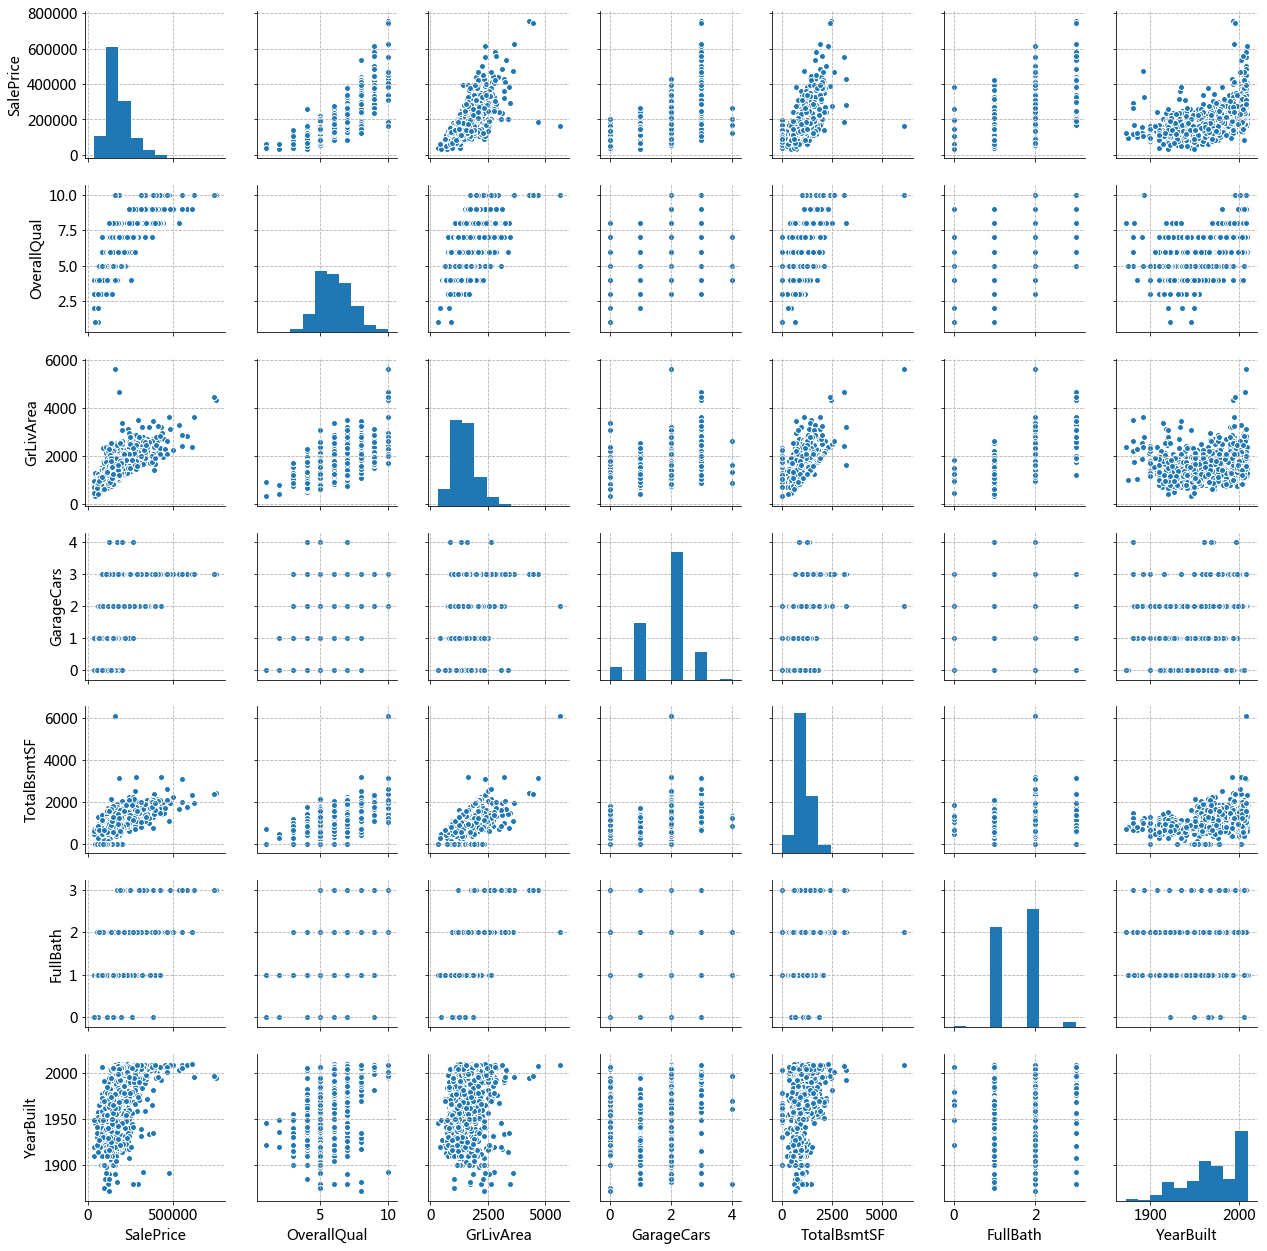

In [54]:
cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','FullBath','YearBuilt']

# 房子质量  建造年份  地下室面积  地面以上面积  车库面积  完整的浴室
sns.pairplot(df[cols])



结论：
1.OverallQual、GarageCars、FullBath是分类变量


## 缺失值处理

In [73]:
# 每列空值个数
total=df.isnull().sum().sort_values(ascending=False)

# 每列的空值率
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

# 合并并添加列名
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])

missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [78]:
# 丢弃含有空值的列

df_c=df.drop(missing_data[missing_data['Total']>1].index,axis=1)

# 只丢弃一行
df_c=df_c.drop(df.loc[df['Electrical'].isnull()].index)
df_c.isnull().sum().max()  # 验证是否还有空值

0